<a href="https://colab.research.google.com/github/acarolr9/TechnicalCase/blob/main/PruebaTecnicaCarolinaLopezP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsión de falla
### Lectura de librerias

In [ ]:
! pip install optbinning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.9/213.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.26.1 which is incompatible.
tensorflow-metadata 1.13

In [ ]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 576.1 kB/s eta 0:00:00


In [ ]:
! pip install shap

In [ ]:
! pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort

In [ ]:

import os
from google.colab import drive

if not os.path.isdir('/content/drive/My Drive'):
    # Montar Google Drive
    drive.mount('/content/drive')
else:
    print("Google Drive ya está montado.")

Google Drive ya está montado.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold


from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.inspection import permutation_importance
from ipywidgets import widgets


from optbinning.scorecard.plots import plot_auc_roc
from optbinning import OptimalBinning


import optuna
from optuna.samplers import TPESampler

import pickle
import shap

from IPython.display import clear_output


(CVXPY) Dec 06 04:58:04 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Dec 06 04:58:04 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


### Lecturas Funciones propias

In [ ]:
main_path = '/content/drive/My Drive/PruebaTecnica3/'
if main_path not in sys.path:
    sys.path.append(main_path)

from utils_modelling import (
    get_optuna_param_space,
    get_model_object,
    adapt_min_child_samples,
    cast_id_cols
)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from utils_analisis import (
    pandas_split_train_test,
    univariate,
    treat_outliers,
    plot_rate_vs_predict,
    compute_metrics,
    get_confusion_matrix_and_metrics_df,
    plot_confusion_matrix,
    plot_confusion_matrix_with_sliders,
    calculate_performance_deciles,
    rebalance_dataset
)

#### Definición de parametros generales

In [ ]:

target = "failure"
seed = 42
test_size = 0.3
keys = [
    'device', 'date'
]

## Lectura de base y division Train -Test

In [ ]:
# Se lee base
df = pd.read_csv(main_path+'full_devices.csv',delimiter=',', decimal='.', encoding='latin1')
df.columns = df.columns.str.lower()
df.head(3)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0


In [ ]:
df.dtypes

,0
date,object
device,object
failure,int64
attribute1,int64
attribute2,int64
attribute3,int64
attribute4,int64
attribute5,int64
attribute6,int64
attribute7,int64


In [ ]:
print(df.dtypes)
##Variable que requieren cambio de formato
list_var=['date']
df[list_var] = df[list_var].apply(pd.to_datetime)
print(df.dtypes)

date          object
device        object
failure        int64
attribute1     int64
attribute2     int64
attribute3     int64
attribute4     int64
attribute5     int64
attribute6     int64
attribute7     int64
attribute8     int64
attribute9     int64
dtype: object
date          datetime64[ns]
device                object
failure                int64
attribute1             int64
attribute2             int64
attribute3             int64
attribute4             int64
attribute5             int64
attribute6             int64
attribute7             int64
attribute8             int64
attribute9             int64
dtype: object


In [ ]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [ ]:
# Se genera train y test
df_train, df_test, stats_df = pandas_split_train_test(df,target, test_size=test_size, random_state=seed)
stats_df.head()

,Dataset,Target_Mean,Count
0,Total,0.000851,124494
1,Train,0.000803,87145
2,Test,0.000964,37349


## Análisis Univariate de la data
#####  Se realiza un analisis basico de distribuciones de las variables crea un código básico para el mismo.


Analisis Univariante para Columnas Categoricas:

Columna: device
device
Z1F0Q8RT    230
W1F0SJJ2    229
Z1F0KKN4    227
Z1F0QK05    226
Z1F1VMZB    226
           ... 
S1F0QWGD      2
W1F1DA5ÿ      1
W1F0WJFT      1
W1F095DW      1
S1F136JY      1
Name: count, Length: 1169, dtype: int64


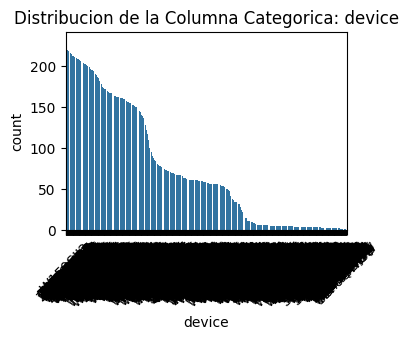


Analisis Univariante para Columnas Numericas:

Columna: attribute1
mean: 122241963.86489184
median: 122575336.0
std: 70448888.49857785
min: 0
max: 244140480
25th percentile: 61172136.0
50th percentile (median): 122575336.0
75th percentile: 183030192.0
missing values: 0
unique values: 86780
total records: 87145


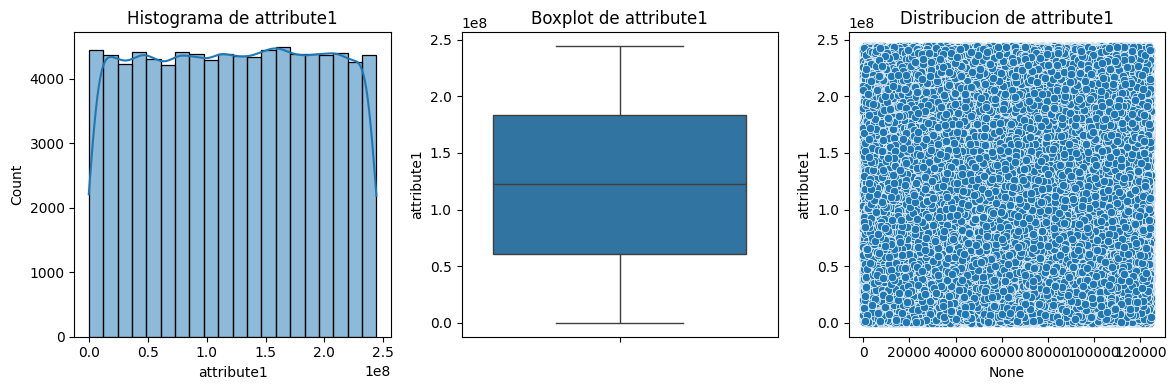


Columna: attribute2
mean: 159.43983016811063
median: 0.0
std: 2167.510789599588
min: 0
max: 64968
25th percentile: 0.0
50th percentile (median): 0.0
75th percentile: 0.0
missing values: 0
unique values: 490
total records: 87145


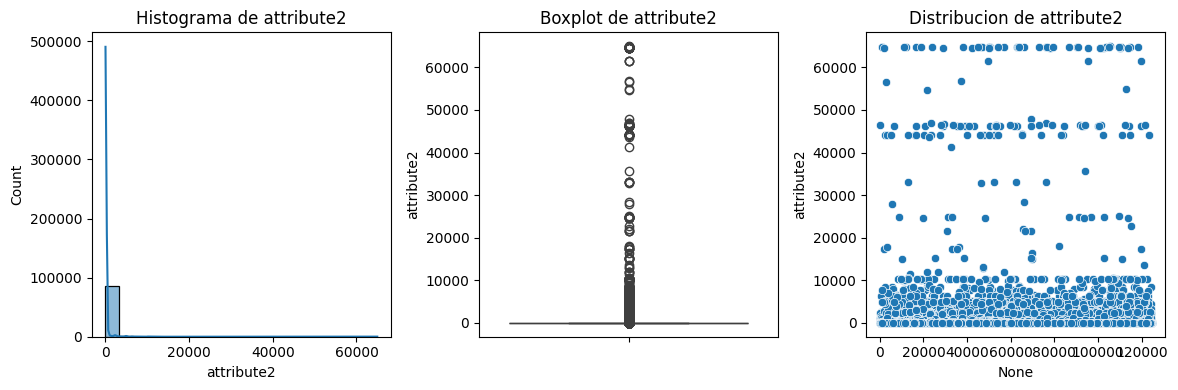


Columna: attribute3
mean: 9.500935222904355
median: 0.0
std: 186.98422257657646
min: 0
max: 24929
25th percentile: 0.0
50th percentile (median): 0.0
75th percentile: 0.0
missing values: 0
unique values: 46
total records: 87145


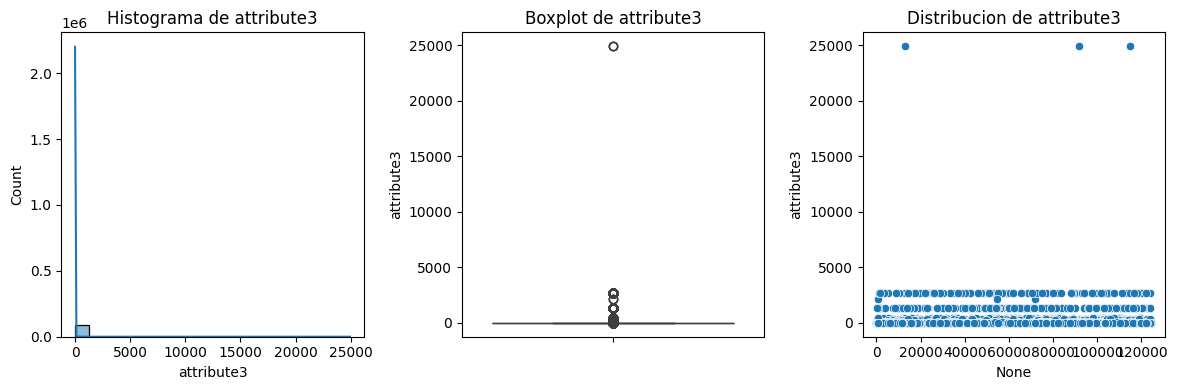


Columna: attribute4
mean: 1.7771644959550175
median: 0.0
std: 23.93915510090686
min: 0
max: 1666
25th percentile: 0.0
50th percentile (median): 0.0
75th percentile: 0.0
missing values: 0
unique values: 100
total records: 87145


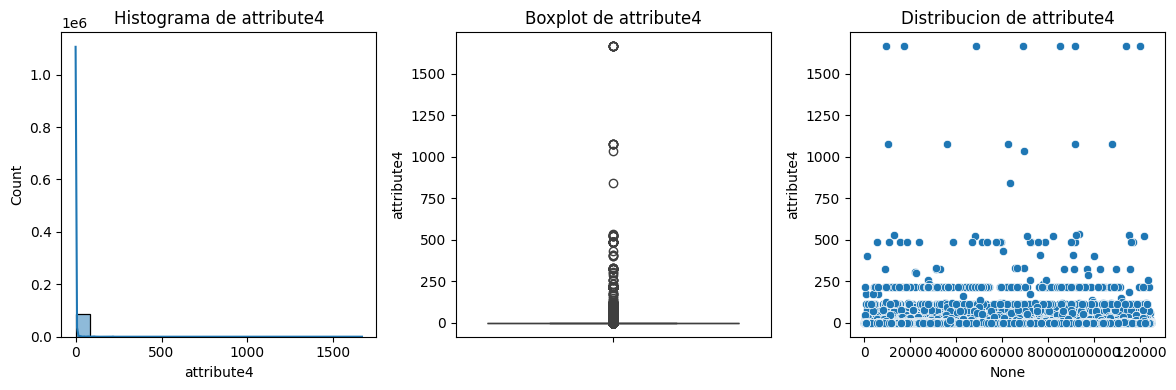


Columna: attribute5
mean: 14.214997991852659
median: 10.0
std: 15.947237186503688
min: 1
max: 98
25th percentile: 8.0
50th percentile (median): 10.0
75th percentile: 12.0
missing values: 0
unique values: 60
total records: 87145


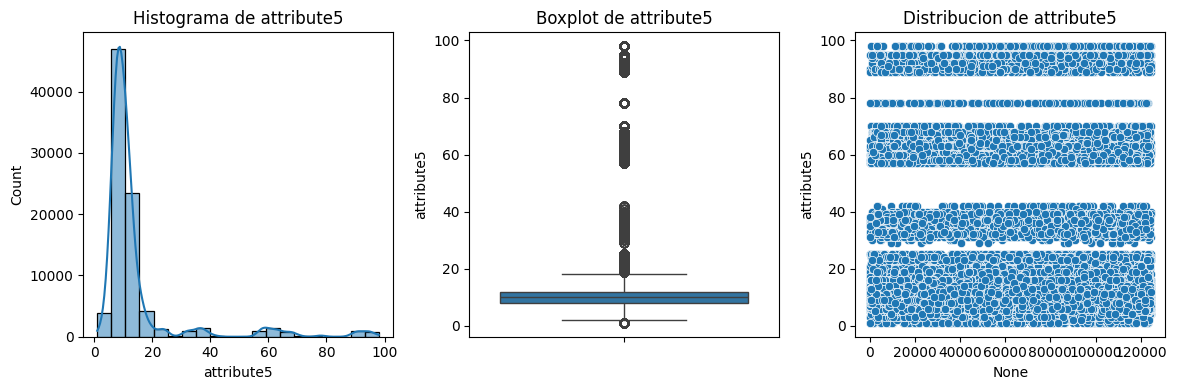


Columna: attribute6
mean: 260371.5973377704
median: 249841.0
std: 99144.35861040562
min: 8
max: 689062
25th percentile: 221403.0
50th percentile (median): 249841.0
75th percentile: 310481.0
missing values: 0
unique values: 35804
total records: 87145


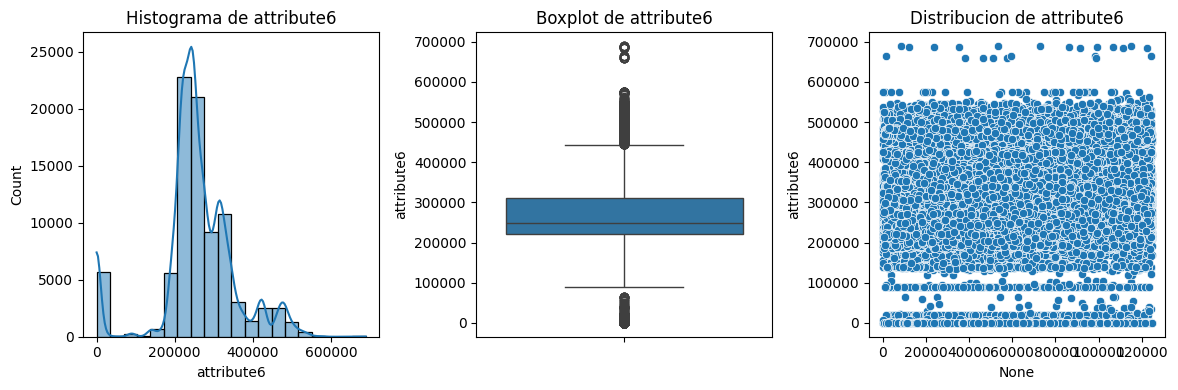


Columna: attribute7
mean: 0.30636295828791094
median: 0.0
std: 7.984442150947302
min: 0
max: 832
25th percentile: 0.0
50th percentile (median): 0.0
75th percentile: 0.0
missing values: 0
unique values: 26
total records: 87145


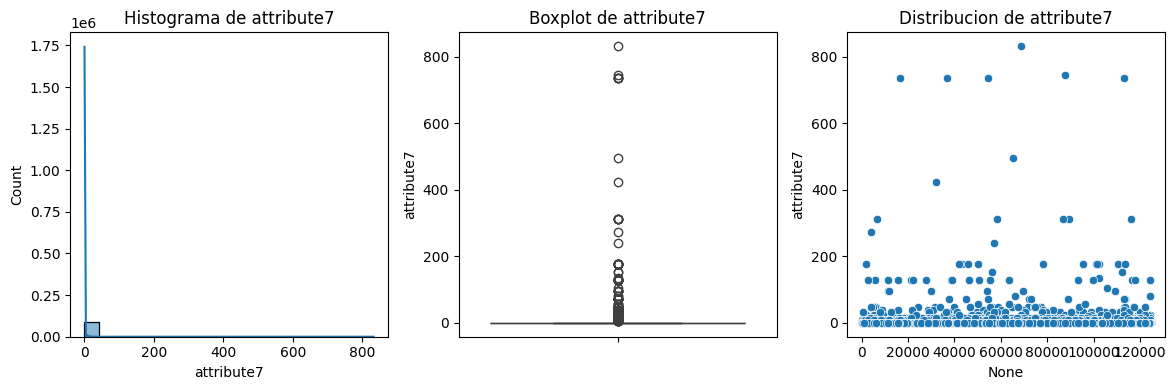


Columna: attribute8
mean: 0.30636295828791094
median: 0.0
std: 7.984442150947302
min: 0
max: 832
25th percentile: 0.0
50th percentile (median): 0.0
75th percentile: 0.0
missing values: 0
unique values: 26
total records: 87145


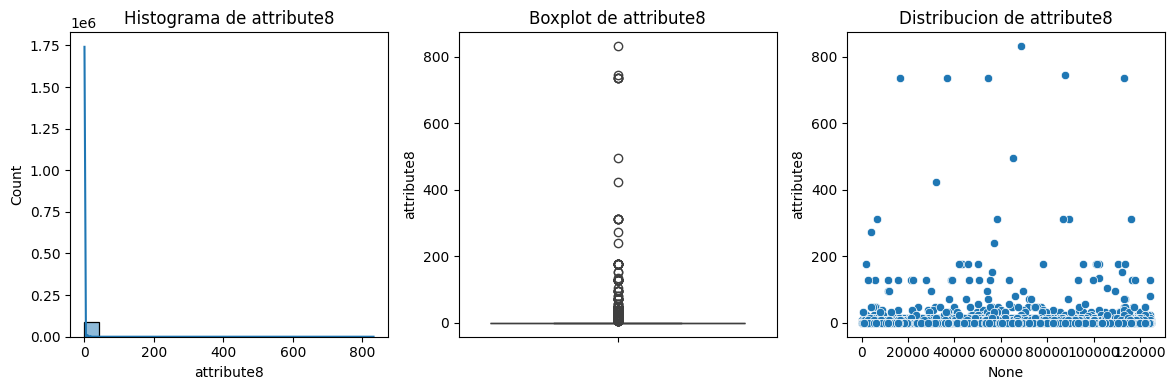


Columna: attribute9
mean: 12.485443800562281
median: 0.0
std: 195.3185894709676
min: 0
max: 18701
25th percentile: 0.0
50th percentile (median): 0.0
75th percentile: 0.0
missing values: 0
unique values: 64
total records: 87145


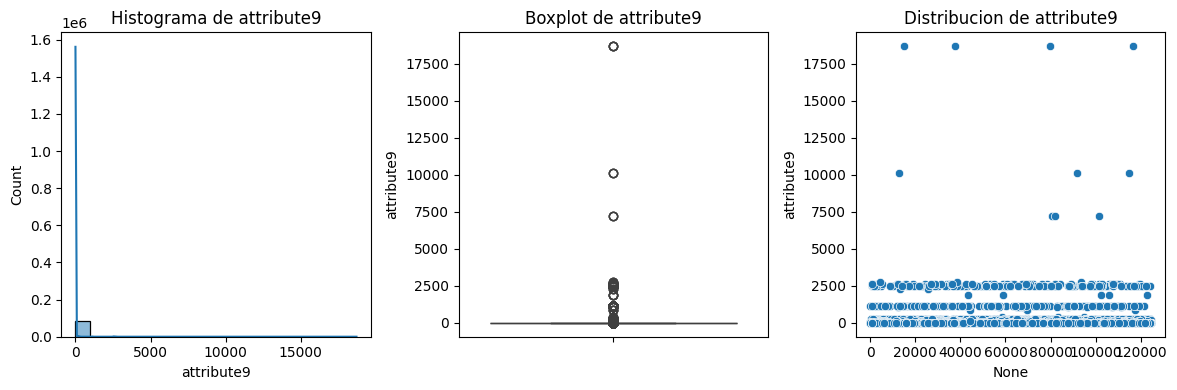

In [ ]:
univariate(df_train,target)

## Tratamiento Missing y Outliers
##### Se realiza la imputación de los valores faltantes con la mediana de la columna y, adicionalmente, se reemplazan los valores outliers con la mediana. Los valores outliers se identifican como aquellos que están por debajo del percentil 1 o por encima del percentil 99. Adicional por la alta asimetria positiva se aplica una transformacion logaritmica de las **variables**

In [ ]:
df_train = treat_outliers(df, exclude_columns=keys + [target], transformation="log")
df_test = treat_outliers(df_test, exclude_columns= keys + [target], transformation="log" )



*************** Variable:  attribute1


/content/drive/My Drive/PruebaTecnica3/utils_analisis.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '241791145.35999995' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["isoutlier_pos"] == 1, col] = upperbound


***** #  outliers: 2490


*************** Variable:  attribute2
***** #  outliers: 1239


*************** Variable:  attribute3
***** #  outliers: 1059


*************** Variable:  attribute4
***** #  outliers: 1212


*************** Variable:  attribute5
***** #  outliers: 2311


*************** Variable:  attribute6
***** #  outliers: 1995


*************** Variable:  attribute7
***** #  outliers: 652


*************** Variable:  attribute8
***** #  outliers: 652


*************** Variable:  attribute9
***** #  outliers: 1131


*************** Variable:  attribute1
***** #  outliers: 748


*************** Variable:  attribute2
***** #  outliers: 367


*************** Variable:  attribute3
***** #  outliers: 355


*************** Variable:  attribute4
***** #  outliers: 347


*************** Variable:  attribute5
***** #  outliers: 677


*************** Variable:  attribute6
***** #  outliers: 729


*************** Variable:  attribute7


/content/drive/My Drive/PruebaTecnica3/utils_analisis.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '501012.48999999993' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["isoutlier_pos"] == 1, col] = upperbound
/content/drive/My Drive/PruebaTecnica3/utils_analisis.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '241976747.84' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["isoutlier_pos"] == 1, col] = upperbound
/content/drive/My Drive/PruebaTecnica3/utils_analisis.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '501011.04' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["is

***** #  outliers: 198


*************** Variable:  attribute8
***** #  outliers: 198


*************** Variable:  attribute9
***** #  outliers: 340



Analisis Univariante para Columnas Categoricas:

Columna: device
device
Z1F0QLC1    304
S1F0KYCR    304
S1F0E9EP    304
S1F0EGMT    304
S1F0FGBQ    304
           ... 
W1F1CHZK      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
W1F1DA5ÿ      1
Name: count, Length: 1169, dtype: int64


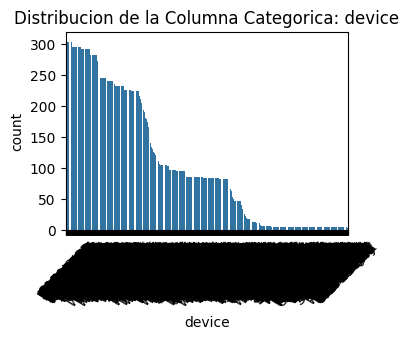


Analisis Univariante para Columnas Numericas:

Columna: attribute1
mean: 18.325641685262717
median: 18.62604631123405
std: 0.954733277874776
min: 14.69140682058289
max: 19.30358487992456
25th percentile: 17.93104180489081
50th percentile (median): 18.62604631123405
75th percentile: 19.026687308261046
missing values: 0
unique values: 121408
total records: 124494


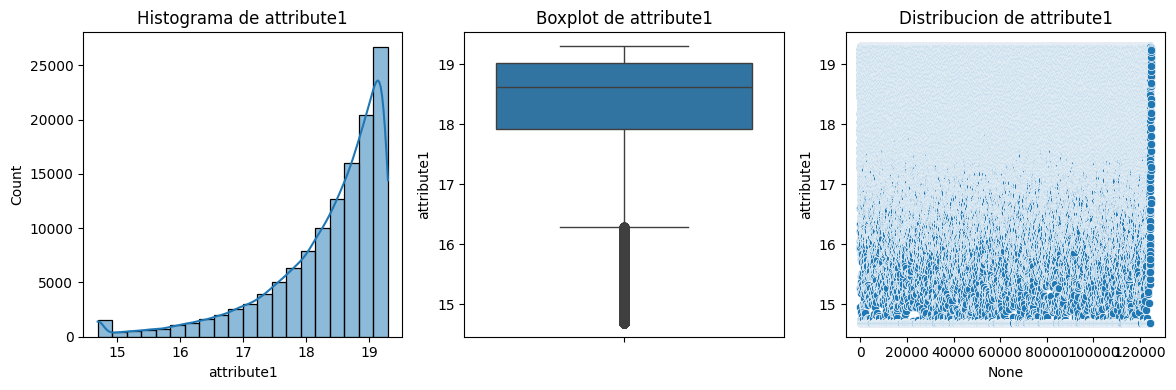


Columna: attribute2
mean: 0.30814557174289237
median: 0.0
std: 1.3837737220618547
min: 0.0
max: 7.887959336599945
25th percentile: 0.0
50th percentile (median): 0.0
75th percentile: 0.0
missing values: 0
unique values: 261
total records: 124494


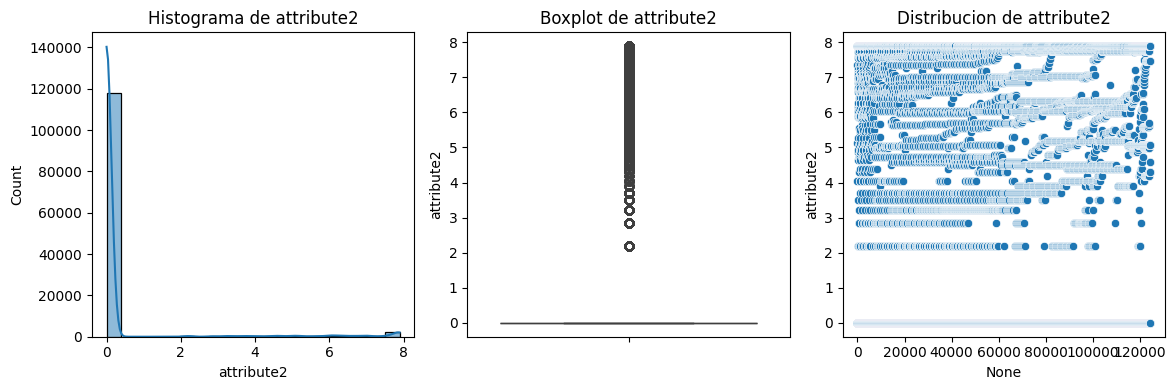


Columna: attribute3
mean: 0.1631783904821721
median: 0.0
std: 0.7159415775294017
min: 0.0
max: 4.68213122712422
25th percentile: 0.0
50th percentile (median): 0.0
75th percentile: 0.0
missing values: 0
unique values: 31
total records: 124494


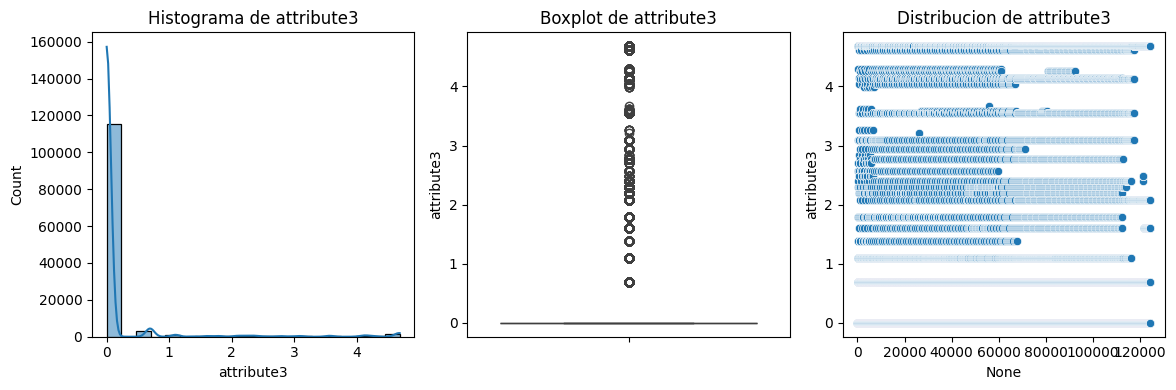


Columna: attribute4
mean: 0.1509874625198502
median: 0.0
std: 0.5677029838028462
min: 0.0
max: 3.258096538021482
25th percentile: 0.0
50th percentile (median): 0.0
75th percentile: 0.0
missing values: 0
unique values: 26
total records: 124494


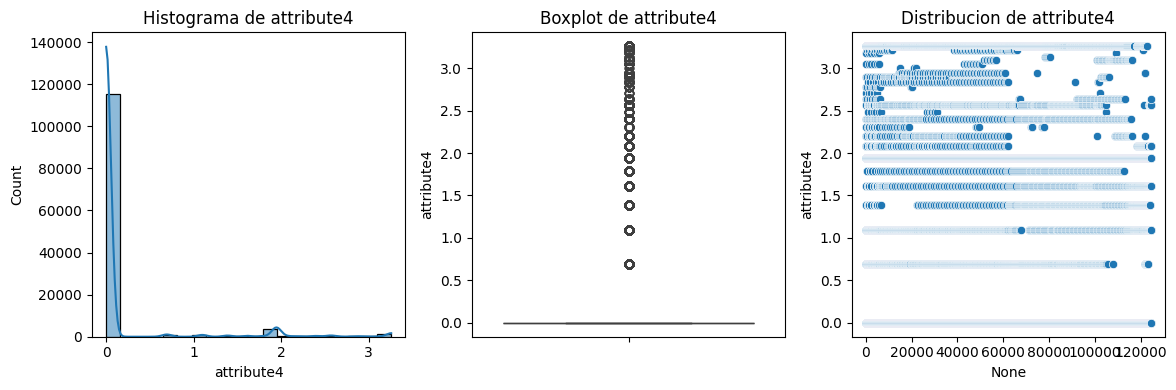


Columna: attribute5
mean: 2.486698592035048
median: 2.3978952727983707
std: 0.5693161827196135
min: 1.6094379124341003
max: 4.532599493153256
25th percentile: 2.1972245773362196
50th percentile (median): 2.3978952727983707
75th percentile: 2.5649493574615367
missing values: 0
unique values: 54
total records: 124494


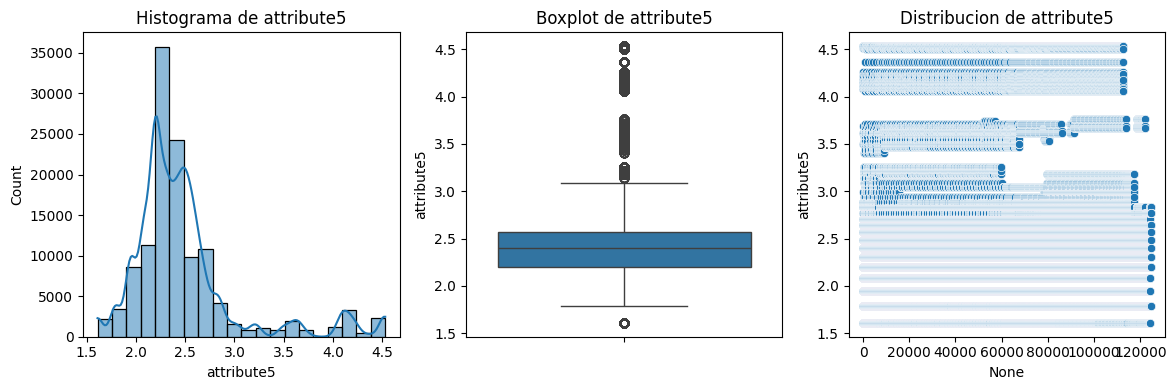


Columna: attribute6
mean: 11.950441126335498
median: 12.428417878270889
std: 2.141680790929178
min: 3.295836866004329
max: 13.124388305852204
25th percentile: 12.307965656335673
50th percentile (median): 12.428417878270889
75th percentile: 12.645188496086236
missing values: 0
unique values: 43859
total records: 124494


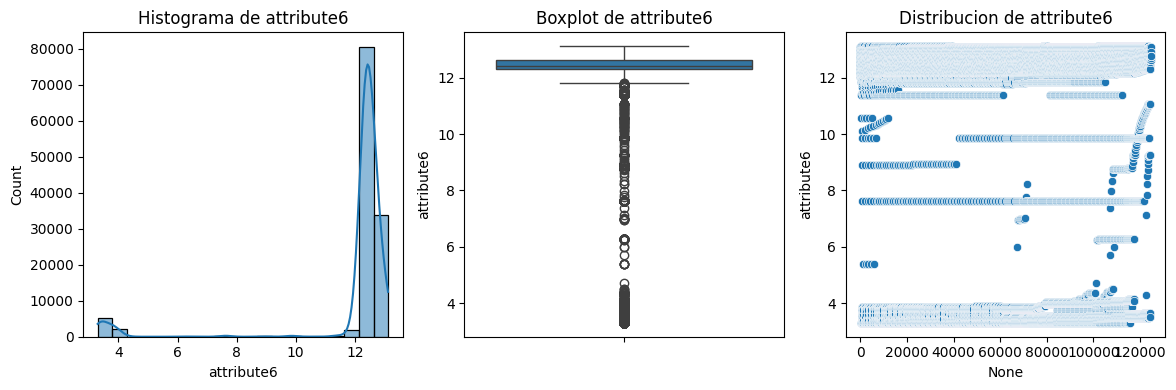


Columna: attribute7
mean: 0.025706350074610473
median: 0.0
std: 0.23615924571916097
min: 0.0
max: 2.1972245773362196
25th percentile: 0.0
50th percentile (median): 0.0
75th percentile: 0.0
missing values: 0
unique values: 3
total records: 124494


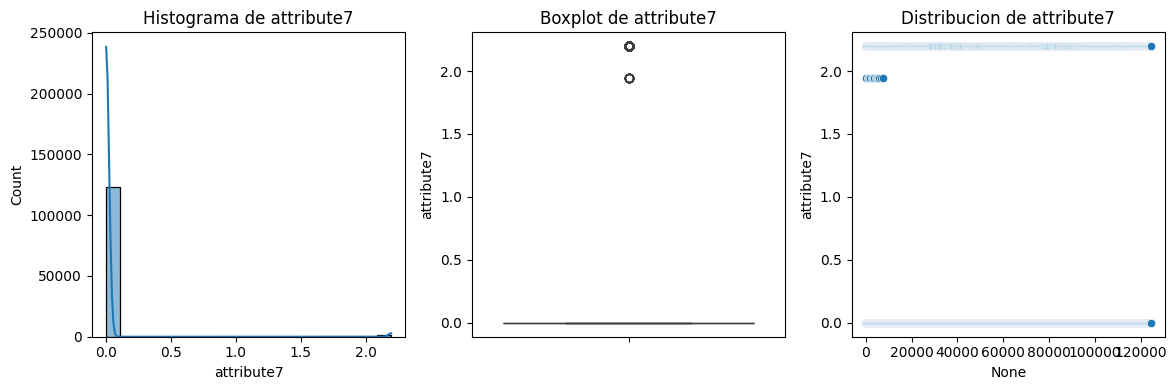


Columna: attribute8
mean: 0.025706350074610473
median: 0.0
std: 0.23615924571916097
min: 0.0
max: 2.1972245773362196
25th percentile: 0.0
50th percentile (median): 0.0
75th percentile: 0.0
missing values: 0
unique values: 3
total records: 124494


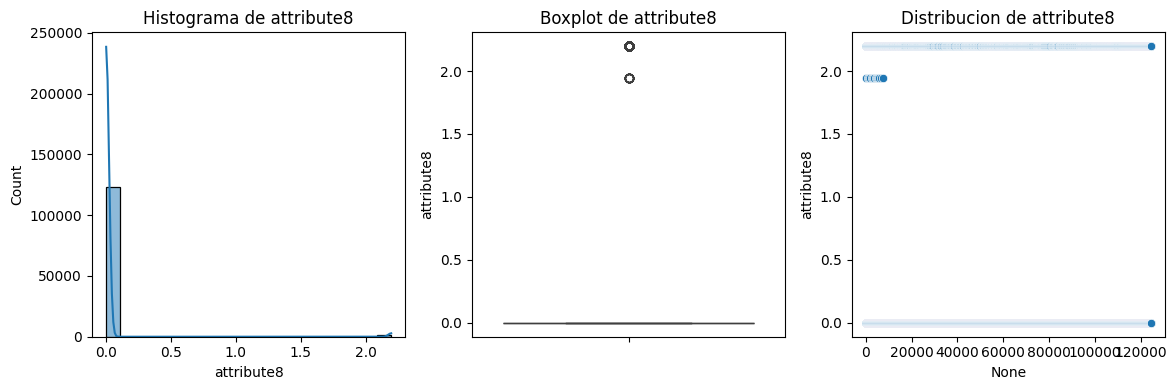


Columna: attribute9
mean: 0.38366959472855333
median: 0.0
std: 0.933135729439226
min: 0.0
max: 5.049856007249537
25th percentile: 0.0
50th percentile (median): 0.0
75th percentile: 0.0
missing values: 0
unique values: 41
total records: 124494


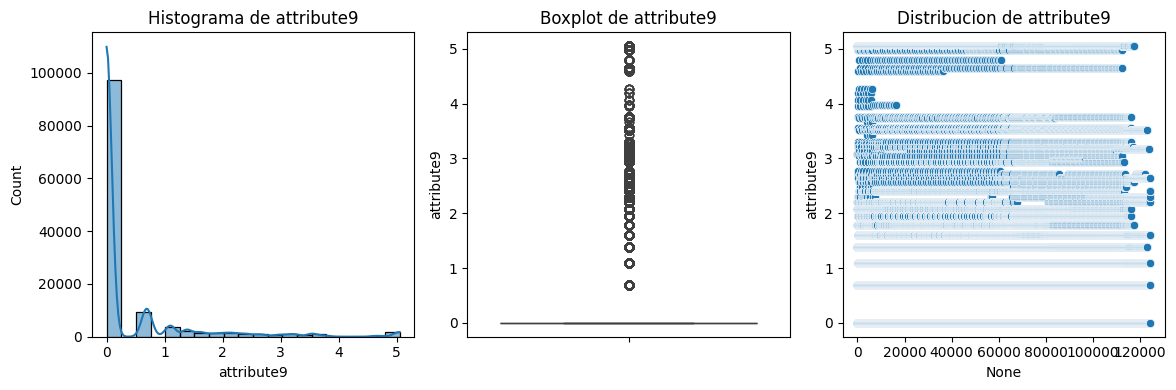

In [ ]:
univariate(df_train,target)

## Balanceo de muestra
##### Dado que la poblacion esta altamente desbalanceada se realiza un balanceo de la misma con el metodo **SMOTEENN**

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def hybrid_resampling(X, y, oversample_ratio=0.5, undersample_ratio=1.0, random_state=42):

    smote = SMOTE(sampling_strategy=oversample_ratio, random_state=random_state)
    X_oversampled, y_oversampled = smote.fit_resample(X, y)

    undersampler = RandomUnderSampler(sampling_strategy=undersample_ratio, random_state=random_state)
    X_resampled, y_resampled = undersampler.fit_resample(X_oversampled, y_oversampled)

    return pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=y.name)



In [ ]:
oversample_ratio = 0.3
undersample_ratio = 1.0
y = df_train[target]
X = df_train.drop(columns=keys + [target], axis = 1)
x_train, y_train = hybrid_resampling(X, y, oversample_ratio=oversample_ratio, undersample_ratio=undersample_ratio)

print("Original class distribution:\n", y.value_counts())
print("Rebalanced class distribution:\n", y_train.value_counts())

Original class distribution:
 failure
0    124388
1       106
Name: count, dtype: int64
Rebalanced class distribution:
 failure
0    37316
1    37316
Name: count, dtype: int64


## Generación de una línea base con regresión logística
### Transformación de variables a woes

In [ ]:
x_test = df_test.drop(columns=keys + [target], axis = 1)
y_test = df_test[target]

In [ ]:
col_type = {
    col: ('numerical' if x_train.dtypes.loc[col] in ['float64', 'int64'] else 'categorical')
    for col in x_train.columns
}

In [ ]:
x_train.columns

Index(['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5',
       'attribute6', 'attribute7', 'attribute8', 'attribute9'],
      dtype='object')

In [ ]:
# Define optimal binning de la variables con respecto al target
min_prebin_size = 0.025
monotonic_trend = 'auto'
cat_cutoff = 0.05
total = len(x_train.columns)
for idx, col in enumerate(x_train.columns):
    clear_output(wait=True)
    print(f'{idx +1}/{total} columns')
    optb = OptimalBinning(
        name= col,
        dtype = col_type[col],
        solver = 'cp',
        min_prebin_size = min_prebin_size,
        monotonic_trend = monotonic_trend,
        cat_cutoff = cat_cutoff,
    )
    x_train[col] = optb.fit_transform(x_train[col], y_train, metric = 'woe')
    x_test[col] = optb.transform(x_test[col], metric = 'woe')


9/9 columns


### Entrenar modelo y validar resultados

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8599394361667917

In [ ]:
lr_probs = model.predict_proba(x_test)
ns_probs = [0 for _ in range(len(y_test))]
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
auc_test = roc_auc_score(y_test, lr_probs)
auc_train = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
# Imprimimos en pantalla
#print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística (train): ROC AUC=%.3f' % (auc_train), 'y GINI=%.3f' % (2*(auc_train)-1))
print('Regresión Logística (test): ROC AUC=%.3f' % (auc_test), 'y GINI=%.3f' % (2*(auc_test)-1))


Regresión Logística (train): ROC AUC=0.944 y GINI=0.889
Regresión Logística (test): ROC AUC=0.898 y GINI=0.795


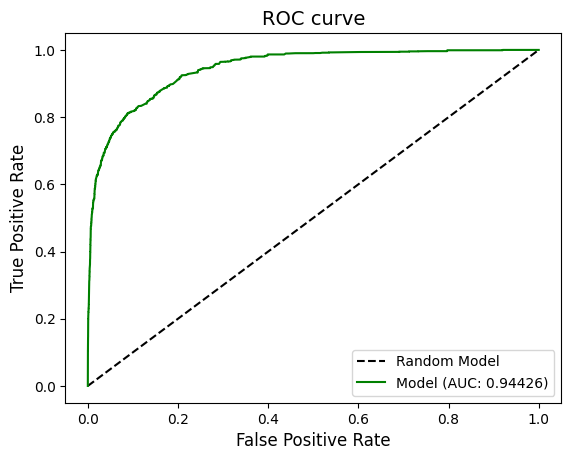

In [ ]:
plot_auc_roc(y_train, model.predict_proba(x_train)[:,1])


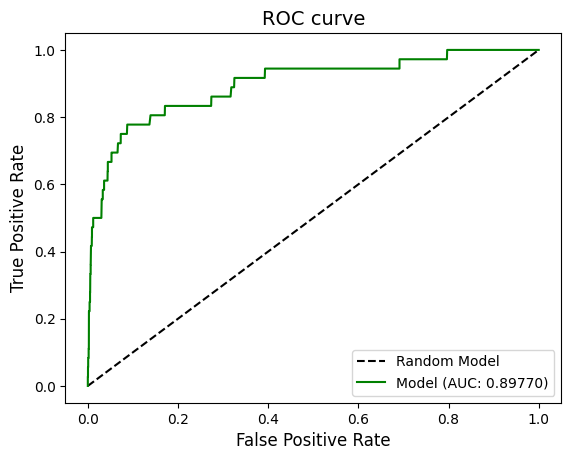

In [ ]:
plot_auc_roc(y_test, model.predict_proba(x_test)[:,1])

Text(0.5, 3.722222222222216, 'Predicted')

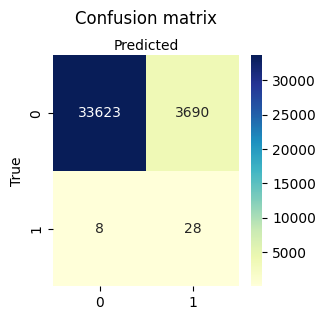

In [ ]:
y_pred = model.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
labels = [0, 1]
fig, ax = plt.subplots(figsize = (3,3))
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

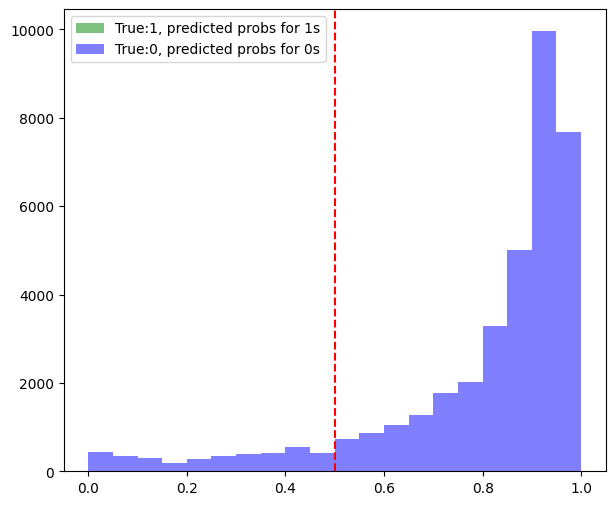

In [ ]:
lr_probs = model.predict_proba(x_test)
probs_1 =  lr_probs[:, 1]
probs_0 =  lr_probs[:, 0]
fig, ax = plt.subplots(figsize=(7,6))
ax.hist(probs_1[y_test==1], bins =20, color = 'g', alpha =.5, label='True:1, predicted probs for 1s')
ax.hist(probs_0[y_test==0], bins =20, color = 'b', alpha =.5, label='True:0, predicted probs for 0s')
ax.axvline(0.5, ls='--', color='r')
ax.legend();

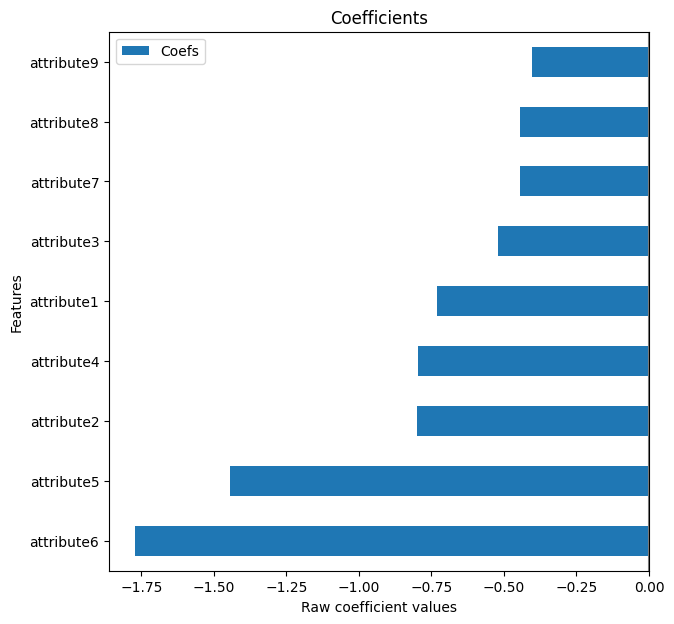

In [ ]:
coefs = model.coef_
features = model.feature_names_in_

coefs_importance = (
    pd.DataFrame({'Features':features.tolist(),'Coefs':coefs[0].tolist()})
    .set_index('Features')
    .sort_values(by=['Coefs'])
)

coefs_importance.plot.barh(figsize=(9, 7))
plt.title("Coefficients")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

## Selecion de modelo de machine learning
#### Se prueban diferentes modelos de machine learning llevando los parametros a niveles comparables entre metodologias y se seleciona el la mejor metodologia

In [ ]:
y = df_train[target]
X = df_train.drop(columns=keys + [target], axis = 1)
x_train, y_train = hybrid_resampling(X, y, oversample_ratio=oversample_ratio, undersample_ratio=undersample_ratio)

x_test = df_test.drop(columns=keys + [target], axis = 1)
y_test = df_test[target]

In [ ]:
## Definición de parametros para selecion de modelo
val_size = 0.2
model_types = ['xgb', 'rf', 'gbm']
metric = 'roc_auc'
target = target
n_splits = 20

In [ ]:
hyperparameters_model_selection = {
    'XGB': {
        'n_estimators': 20,
        'max_depth': 5,
        'subsample': 1.0,
        'colsample_bytree': 1.0,
        'objective': 'binary:logistic',
        'eta': 0.1,
        'seed': seed,
        'gamma': 0,
        'min_child_weight': int(len(x_train) * 0.03)
    },
    'RF': {
        'n_estimators': 20,
        'max_depth': 5,
        'min_samples_split': int(len(x_train) * 0.01)
    },
    'GBM': {
        'n_estimators': 20,
        'max_depth': 5,
        'subsample': 1.0,
        'learning_rate': 0.1,
        'random_state': seed,
        'min_samples_split': int(len(x_train) * 0.01)
    },
}


In [ ]:
## Funcion para muestras de cross validation
tscv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

In [ ]:
for model_type_iter, params_iter in hyperparameters_model_selection.items():
    classifier_obj = get_model_object(model_type_iter, params_iter, categorical_features=[])

    # Pipeline setup for XGBoost
    if model_type_iter == "XGB":
        pipe = Pipeline([(model_type_iter, classifier_obj)])
    else:
        pipe = classifier_obj

    # Cross-validation
    cv_results = cross_validate(
        pipe,
        x_train,
        y_train,
        return_train_score=True,
        cv=tscv,
        scoring=metric,
        n_jobs=-1,
    )

    # Calculate metrics
    roc_auc = round(np.mean(cv_results['test_score']), 5)
    diff_scores = [abs(i - j) for i, j in zip(cv_results['train_score'], cv_results['test_score'])]
    gap_overfitting = round(np.mean(diff_scores), 5)
    print(f"Model {model_type_iter}: mean validation AUC {roc_auc}, mean overfitting gap {gap_overfitting}")


Model XGB: mean validation AUC 0.93242, mean overfitting gap 0.00373
Model RF: mean validation AUC 0.96047, mean overfitting gap 0.00228
Model GBM: mean validation AUC 0.98104, mean overfitting gap 0.00122



*   Model XGB: mean validation AUC 0.93242, mean overfitting gap 0.00373
*   Model RF: mean validation AUC 0.96047, mean overfitting gap 0.00228
*   Model GBM: GBM: mean validation AUC 0.98104, mean overfitting gap 0.00122




El mejor modelo es GBM, ya que tiene el AUC más alto en validación (0.98104), lo que refleja una excelente capacidad predictiva, y su mean overfitting gap (0.00122) es el menor, indicando que generaliza mejor sin sobreajustarse. Aunque RF y XGB también presentan buenos resultados, GBM ofrece el mejor balance entre rendimiento y robustez.

## Optimización de Hiperparametros

In [ ]:
model_type = 'GBM'
seed = 42
metric = 'roc_auc'
n_trials_optuna = 50

### Optuna optimización multi objetivo
**Validacion cruzada**
*   Maximize mean validation AUC
*   Minimize sum of overfitting gaps

In [ ]:
# Optuna Parameter Space
def get_optuna_param_space(model_type, n_data, trial):
    low_limit_min_child_weight = int(n_data * 0.001)
    upper_limit_min_child_weight = int(n_data * 0.2)
    step = int(n_data * 0.001)

    if model_type == "XGB":
        param_space = {
            'n_estimators': trial.suggest_int('n_estimators', 20, 100, step=1),
            'max_depth': trial.suggest_int('max_depth', 1, 4, step=1),
            'subsample': trial.suggest_float('subsample', 0.1, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
            'eta': trial.suggest_float('eta', 0.01, 0.1, log=True),
            'min_child_weight': trial.suggest_int(
                'min_child_weight',
                low_limit_min_child_weight,
                upper_limit_min_child_weight,
                step=step
            ),
        }
    elif model_type == "GBM":
        param_space = {
            'n_estimators': trial.suggest_int('n_estimators', 20, 100, step=1),
            'max_depth': trial.suggest_int('max_depth', 1, 4, step=1),
            'num_leaves': trial.suggest_int('num_leaves', 20, 45, step=1),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
            'min_child_samples': trial.suggest_int(
                'min_child_samples',
                low_limit_min_child_weight,
                upper_limit_min_child_weight,
                step=step
            ),
        }
    elif model_type == "RF":
        param_space = {
            'n_estimators': trial.suggest_int('n_estimators', 20, 100, step=1),
            'max_depth': trial.suggest_int('max_depth', 1, 4, step=1),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5, step=1),
            'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
            'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 'auto']),
        }
    else:
        raise ValueError(f"Unsupported model_type: {model_type}")

    return param_space

In [ ]:
def objective(trial):
    # Define parameter space
    param_space = get_optuna_param_space(model_type, len(x_train), trial)
    classifier_obj = get_model_object(model_type, param_space, categorical_features=[])

    # Cross-validation
    cv_results = cross_validate(
        classifier_obj,
        x_train,
        y_train,
        return_train_score=True,
        cv=tscv,
        scoring=metric,
        n_jobs=-1,
    )

    # Calculate metrics
    roc_auc = np.mean(cv_results['test_score'])
    diff_scores = [i - j for i, j in zip(cv_results['train_score'], cv_results['test_score'])]
    gap_overfitting = np.mean(diff_scores)

    return roc_auc, gap_overfitting

# Create and run Optuna study
study = optuna.create_study(directions=["maximize", "minimize"], sampler=TPESampler())
study.optimize(objective, n_trials=n_trials_optuna)


[I 2024-12-06 09:06:43,820] A new study created in memory with name: no-name-a13be1f9-b38e-4849-bdd7-690dc73c2e32
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:708: UserWarning: The distribution is specified by [74, 14926] and step=74, but the range is not divisible by `step`. It will be replaced by [74, 14874].
  warnings.warn(
[I 2024-12-06 09:06:56,914] Trial 0 finished with values: [0.9585333533772273, 0.00021971218055688024] and parameters: {'n_estimators': 54, 'max_depth': 4, 'num_leaves': 24, 'subsample': 0.9171829849825479, 'feature_fraction': 0.35022166603410587, 'learning_rate': 0.08095177907751493, 'min_child_samples': 7104}.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:708: UserWarning: The distribution is specified by [74, 14926] and step=74, but the range is not divisible by `step`. It will be replaced by [74, 14874].
  warnings.warn(
[I 2024-12-06 09:07:08,308] Trial 1 finished with values: [0.9057800244819099, 4.168132815333125e-05] 

In [ ]:
optuna.visualization.plot_pareto_front(study, target_names=["AUC", "GAP Overfitting"], axis_order=[1, 0])

/usr/local/lib/python3.10/dist-packages/optuna/visualization/_pareto_front.py:189: FutureWarning: `axis_order` has been deprecated in v3.0.0. This feature will be removed in v5.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0.
  warnings.warn(msg, FutureWarning)


In [ ]:
optuna.visualization.plot_param_importances(
    study, target=lambda t: t.values[0], target_name="AUC"
)

In [ ]:
trial_selected = 18
print(study.trials[trial_selected].values)
best_params = study.trials[trial_selected].params
print("Best params: {}".format(best_params))

[0.9609808626886327, 0.00018776663840190943]
Best params: {'n_estimators': 45, 'max_depth': 4, 'num_leaves': 37, 'subsample': 0.6759733478603425, 'feature_fraction': 0.11027440814065936, 'learning_rate': 0.053004600073036, 'min_child_samples': 3700}


In [ ]:
point_id = trial_selected
best_params = study.trials[point_id].params
best_params = adapt_min_child_samples(
    x_train.shape[0],
    x_train.shape[0],
    model_type,
    best_params
)
classifier = get_model_object(model_type, best_params, categorical_features=[])
classifier.fit(
        x_train,
        y_train
    )

preds_train = classifier.predict_proba(x_train)[:, 1]
preds_test = classifier.predict_proba(x_test)[:, 1]
roc_auc_train = roc_auc_score(y_train, preds_train)
roc_auc_test = roc_auc_score(y_test, preds_test)
print("Best params: {}".format(best_params))
print("AUC TRAIN: {}".format(roc_auc_train))
print("AUC TEST: {}".format(roc_auc_test))

[LightGBM] [Warning] feature_fraction is set=0.11027440814065936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11027440814065936
[LightGBM] [Warning] feature_fraction is set=0.11027440814065936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11027440814065936
[LightGBM] [Info] Number of positive: 37316, number of negative: 37316
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number of data points in the train set: 74632, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [ ]:
model_filename = f"{main_path}model_{model_type.lower()}.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(classifier, file)

print(f"Modelo guardado en {model_filename}")

Modelo guardado en /content/drive/My Drive/PruebaTecnica3/model_gbm.pkl


## Evaluacion del modelo

In [ ]:
model_filename =  f"{main_path}model_{model_type.lower()}.pkl"
with open(model_filename, 'rb') as file:
    model = pickle.load(file)

In [ ]:
y_train = df_train[target]
x_train = df_train.drop(columns=keys + [target], axis = 1)

x_test = df_test.drop(columns=keys + [target], axis = 1)
y_test = df_test[target]

Top 10 Características más importantes:
      Feature  Importance
4  attribute5          44
5  attribute6          30
1  attribute2          28
3  attribute4          21
8  attribute9          20
0  attribute1          16
6  attribute7           6
2  attribute3           5
7  attribute8           4


<Figure size 1000x800 with 0 Axes>

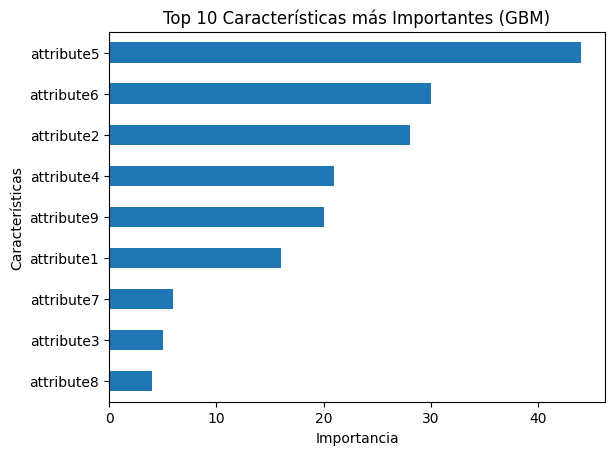

In [ ]:
# Obtener la importancia de las características
if hasattr(model, "feature_importances_"):
    feature_importance = model.feature_importances_
    features = x_train.columns  # Asegúrate de que x_train contiene los nombres de las columnas originales

    # Crear un DataFrame con las importancias
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    # Imprimir las 10 características más importantes
    print("Top 10 Características más importantes:")
    print(feature_importance_df.head(10))

    # Gráfico de barras horizontal
    plt.figure(figsize=(10, 8))
    feature_importance_df.head(10).plot.barh(x='Feature', y='Importance', legend=False)
    plt.title("Top 10 Características más Importantes (GBM)")
    plt.xlabel("Importancia")
    plt.ylabel("Características")
    plt.gca().invert_yaxis()  # Invertir el orden para que la más importante esté arriba
    plt.show()
else:
    print("El modelo cargado no tiene el atributo 'feature_importances_'. Verifica que sea un modelo basado en árboles.")

In [ ]:
predict_train = model.predict_proba(x_train)
roc_train = roc_auc_score(y_train, predict_train[:, 1])

[LightGBM] [Warning] feature_fraction is set=0.11027440814065936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11027440814065936


In [ ]:
predict_test = model.predict_proba(x_test)
roc_test = roc_auc_score(y_test, predict_test[:, 1])

[LightGBM] [Warning] feature_fraction is set=0.11027440814065936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11027440814065936


In [ ]:
df_test['score'] = predict_test[:, 1]
df_train['score'] = predict_train[:, 1]

### Calcular y Mostrar Métricas de Confusión con Deslizadores

Best Threshold=0.765, F-Score=0.097


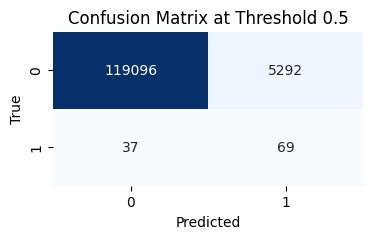

       Value
Metric   NaN


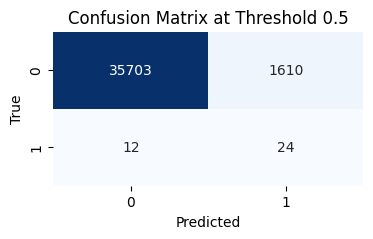

       Value
Metric   NaN


In [ ]:
# Encontrar el mejor umbral basado en el conjunto de entrenamiento
precision, recall, thresholds = precision_recall_curve(df_train[target], df_train['score'])
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%.3f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# Mostrar la matriz de confusión con deslizadores para el conjunto de entrenamiento
true_values_train = df_train[target]
probabilities_train = df_train['score']
plot_confusion_matrix_with_sliders(true_values_train, probabilities_train)

# Mostrar la matriz de confusión con deslizadores para el conjunto de prueba
true_values_test = df_test[target]
probabilities_test = df_test['score']
plot_confusion_matrix_with_sliders(true_values_test, probabilities_test)

### Evaluar el Rendimiento por Deciles

In [ ]:
# Calcular deciles para df_train
df_decils_train = calculate_performance_deciles(df_train, 'score', target, threshold=0.245826, buckets=10)
df_decils_train

,count,target,even rate,min,max,mean
decile,,,,,,
0,12450,0,0.000000,0.214496,0.276005,0.262247
1,12449,1,0.000080,0.276005,0.294887,0.284667
2,12449,1,0.000080,0.294887,0.310915,0.302629
3,12450,0,0.000000,0.310915,0.322800,0.317415
4,12449,3,0.000241,0.322800,0.338195,0.330736
5,12449,2,0.000161,0.338195,0.359008,0.348371
6,12450,5,0.000402,0.359008,0.374217,0.366119
7,12449,6,0.000482,0.374217,0.392599,0.382943
8,12449,9,0.000723,0.392599,0.423688,0.406045
